In [4]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

     |████████████████████████████████| 274 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 34.2 MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.0-py3-none-any.whl size=284180 sha256=6fdc6740e8501ad0b2b8a779bdc154e1910823b386671eeeddf8439b871070a7
  Stored in directory: /home/iahmad/.cache/pip/wheels/05/1a/3f/6b78b5cf3a5b8ed95a487c2539755c9e97907e53594dfe8e35
Successfully built lime
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [60]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [61]:
df.size

8418

In [62]:
df.shape

(366, 23)

In [63]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

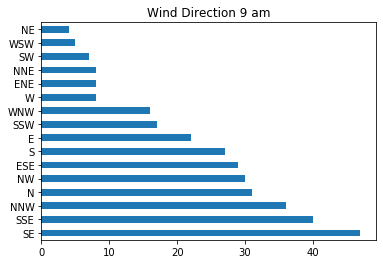

In [64]:
df.WindDir9am.value_counts().plot(kind = 'barh')
plt.title("Wind Direction 9 am")
plt.show()

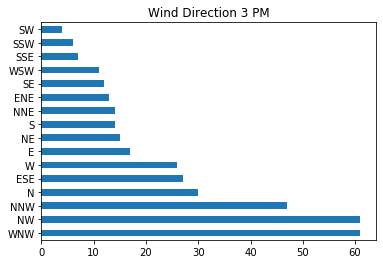

In [65]:
df.WindDir3pm.value_counts().plot(kind="barh")
plt.title("Wind Direction 3 PM")
plt.show()

In [66]:
df['RainToday']=df['RainToday'].apply(lambda x:1 if x == "Yes" else 0)

In [67]:
df['RainTomorrow']=df['RainTomorrow'].apply(lambda x:1 if x == "Yes" else 0)

In [68]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,2007-11-02,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,2007-11-03,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,2007-11-04,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,2007-11-05,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


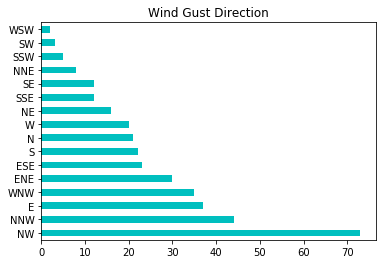

In [69]:
df.WindGustDir.value_counts().plot(kind = "barh",color = 'c')
plt.title("Wind Gust Direction")
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()

In [72]:
df=df.dropna()

In [73]:
df.shape

(328, 23)

In [74]:
df.WindGustDir = le.fit_transform(df.WindGustDir)

In [75]:
df.WindDir3pm = le.fit_transform(df.WindDir3pm)

In [76]:
df.WindDir9am = le.fit_transform(df.WindDir9am)

In [78]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [79]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,6.192073,40.396341,7.067073,7.512195,10.414634,...,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,0.185976,1.422561,0.182927
std,5.945199,6.707310,4.289427,2.681183,3.506646,4.337765,13.132176,3.897197,4.560819,7.811544,...,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,0.389681,4.234023,0.387197
min,-5.300000,7.600000,0.000000,0.200000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000,0.000000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,2.000000,31.000000,3.000000,4.000000,6.000000,...,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000,0.000000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,6.500000,39.000000,7.500000,7.000000,7.000000,...,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000,0.000000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,8.000000,46.000000,10.000000,13.000000,13.000000,...,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.000000,0.200000,0.000000
max,20.900000,35.800000,39.800000,13.800000,13.600000,15.000000,98.000000,15.000000,15.000000,41.000000,...,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,1.000000,39.800000,1.000000


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x = df.drop(['Date','RainTomorrow'],axis=1)

In [82]:
y = df['RainTomorrow']

In [83]:
train_x , train_y ,test_x , test_y = train_test_split(x,y , test_size = 0.2,random_state = 2)

In [84]:
train_x.shape

(262, 21)

In [85]:
train_y.shape

(66, 21)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()

In [88]:
model.fit(train_x , test_x)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
predict = model.predict(train_y)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(predict , test_y)

0.9696969696969697